In [1]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Import data
wine_df = pd.read_csv('static/data/winemag.csv')
wine_df.head(5)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,84,Broke Ass 2009 Red Malbec-Syrah (Mendoza),"Crimson in color but also translucent, with a ...",Michael Schachner,@wineschach,4.0,Red,Malbec-Syrah,Mendoza,NaN,Mendoza Province,Argentina,Broke Ass
1,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
2,86,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,Anna Lee C. Iijima,NaN,4.0,UnWineD,Pinot Grigio,NaN,NaN,Viile Timisului,Romania,Cramele Recas
3,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
4,82,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Michael Schachner,@wineschach,4.0,Flirty Bird,White Blend,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis


/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


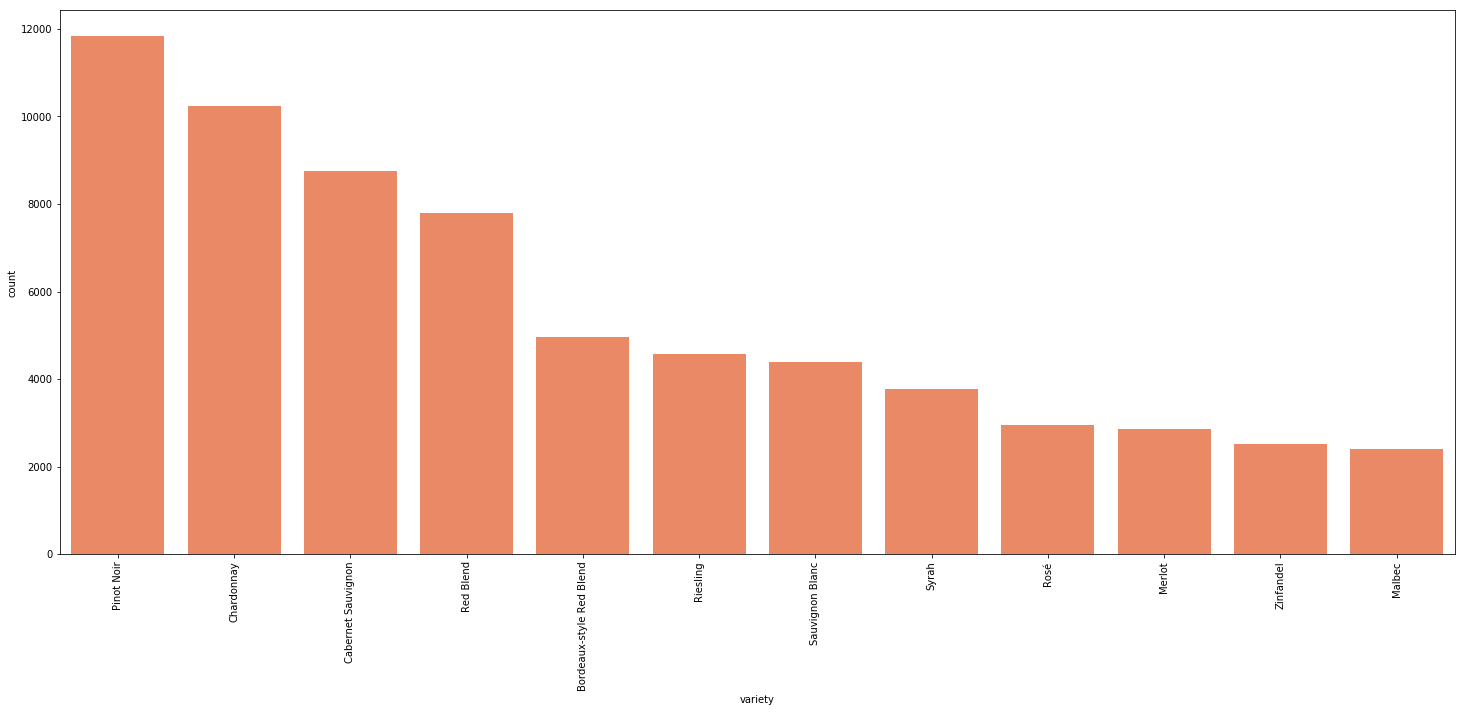

In [18]:
v_df = wine_df.groupby('variety').filter(lambda x: len(x) > 2200)
varieties = v_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = v_df['variety'], order = varieties, ax = ax, color = 'coral')
plt.xticks(rotation = 90)
plt.show()

In [5]:
filename = 'kmeansmodel.pk'
with open(filename, 'rb') as fh:
   b = pickle.load(fh)

In [6]:
print(b)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100,
    n_clusters=12, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [10]:
model = b
order_centroids= model.cluster_centers_.argsort()[:,::-1]
order_centroids

array([[ 2403,  4083,  5676, ..., 14702, 14703, 23771],
       [ 2402,  1019, 14970, ..., 14641, 14642, 23771],
       [ 2406,  8327,  4084, ..., 14286, 14287, 23771],
       ..., 
       [ 2578, 13084, 23385, ..., 14091, 14092, 23771],
       [15636, 14187,  4084, ..., 14346, 14347, 23771],
       [ 3989, 15617,  3272, ..., 14413, 14414, 23771]])

In [12]:
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [14]:
filename = 'vectorizer.pk'
with open(filename, 'rb') as fh:
   c = pickle.load(fh)

In [16]:
vectorizer = c
terms=vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d" %i),
    for ind in order_centroids[i,:12]:
        print('%s'%terms[ind]),
    print
print("\n")
print("Prediction")
Y=vectorizer.transform(["zinfandel"])
prediction=model.predict(Y)
print(prediction)

Cluster 0
blackberries
cherries
currants
dry
tannins
flavors
raspberries
wine
black
rich
sweet
oak
Cluster 1
black
alongside
palate
tannins
aromas
cherry
offers
pepper
sangiovese
opens
delivers
spice
Cluster 2
blackberry
flavors
cherry
tannins
currant
dry
wine
sweet
rich
oak
soft
black
Cluster 3
fruit
wine
cherry
flavors
black
palate
aromas
finish
red
nose
tannins
spice
Cluster 4
apple
lemon
lime
palate
citrus
finish
flavors
peach
riesling
dry
acidity
nose
Cluster 5
cabernet
sauvignon
merlot
blend
franc
verdot
petit
black
malbec
syrah
cherry
fruit
Cluster 6
berry
aromas
plum
finish
herbal
flavors
palate
feels
notes
oak
black
red
Cluster 7
wine
fruits
wood
drink
tannins
ripe
aging
fruit
rich
acidity
firm
structure
Cluster 8
wine
acidity
drink
crisp
fruity
ready
fruits
attractive
red
soft
ripe
light
Cluster 9
bodied
medium
wine
flavors
texture
fruit
finish
aromas
cherry
light
oak
black
Cluster 10
pinot
noir
cherry
silky
cola
flavors
raspberry
dry
acidity
cherries
drink
wine
Cluster 11
ch

In [20]:
v_df['cluster'] = model.labels_

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Blues')

ax2.set_ylabel('K-Clusters', fontdict = {'size': 20})
ax2.set_xlabel('Wine Varieties', fontdict = {'size': 20})

for label in ax2.get_xticklabels():
    label.set_weight("bold")
    label.set_size(20)
for label in ax2.get_yticklabels():
    label.set_weight("bold")
    label.set_size(20)
        

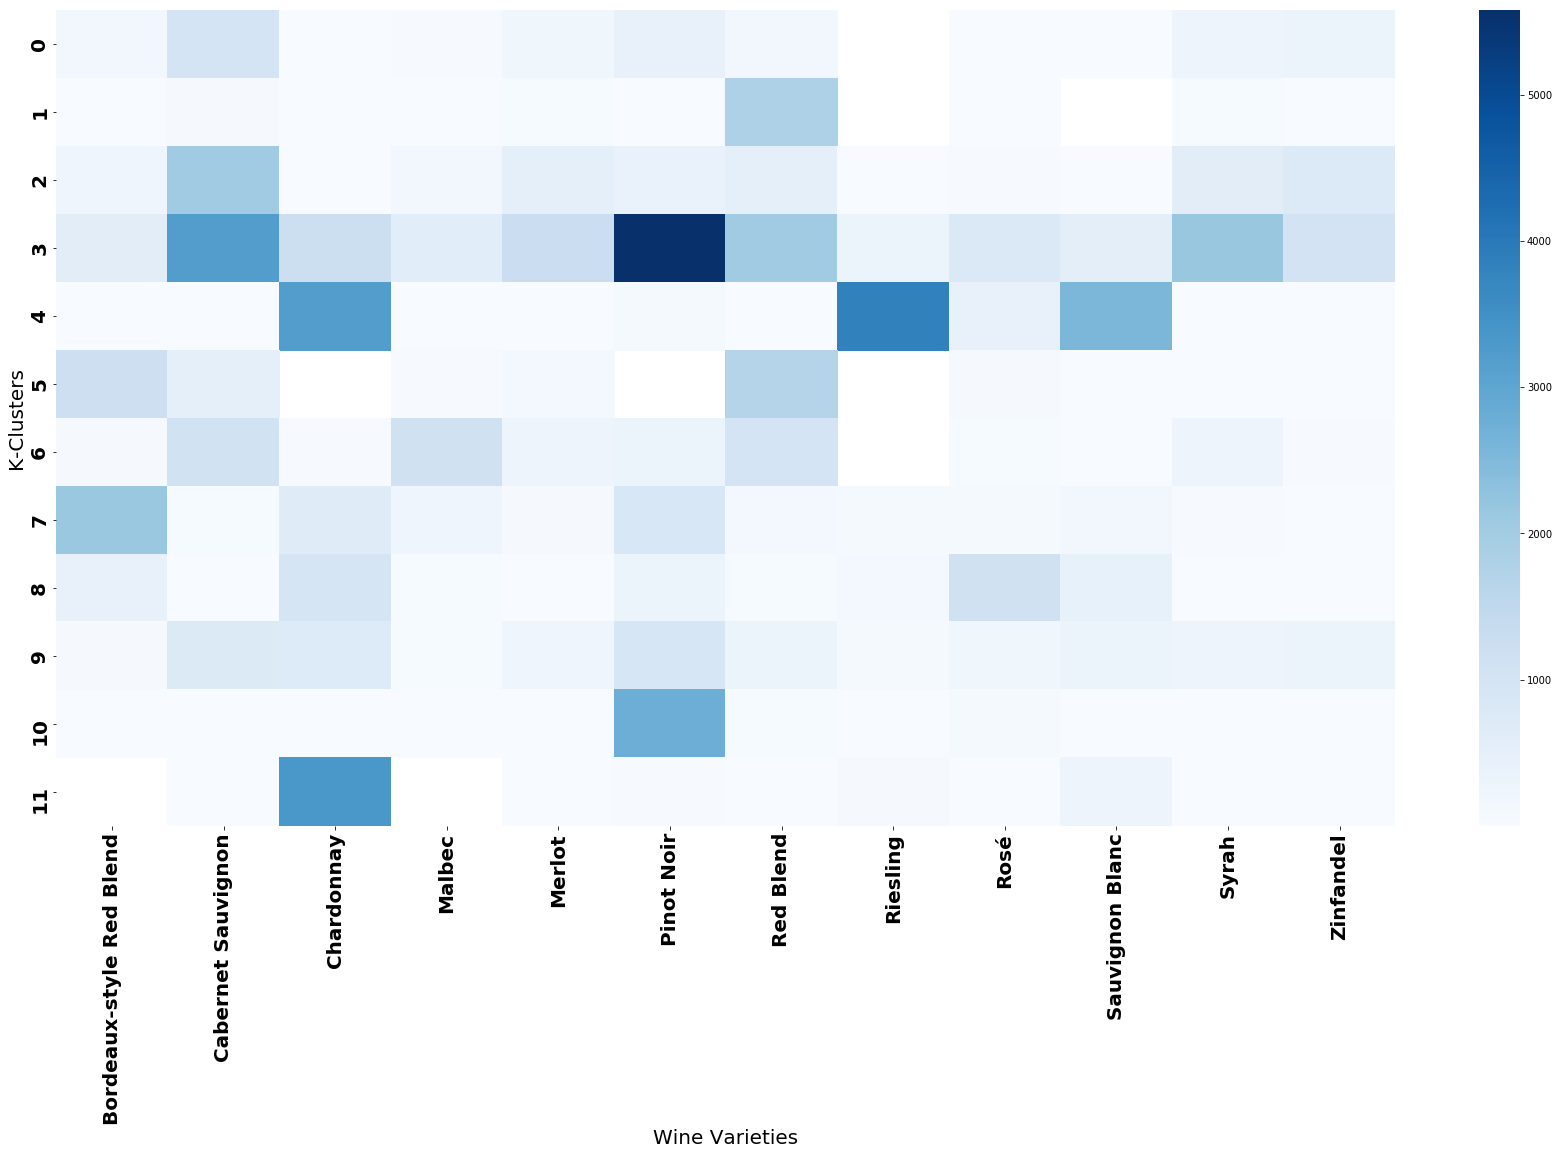

In [40]:
plt.show()